# Imports

In [65]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn import preprocessing
from numpy import quantile, where, random
import statistics as stat
import random as rd

# Data

## Data set 1

In [45]:
n = 400
X0, y0 = datasets.make_moons(n_samples=n, noise=0.05)
X0 = preprocessing.scale(X0)

X_noise = np.random.uniform(low=-2, high=2, size=(int(0.1*n), X0.shape[1]))
X = np.vstack([X0, X_noise])

y_noise = -1 * np.ones(int(0.1*n))
y = np.hstack([y0, y_noise])

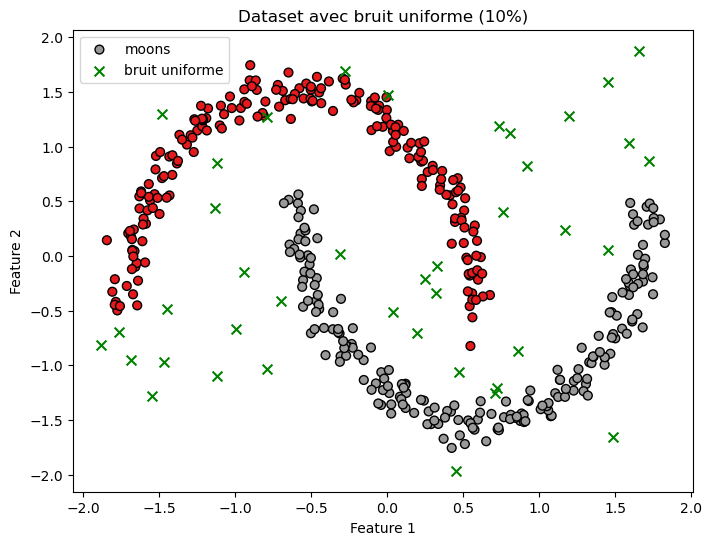

In [46]:
plt.figure(figsize=(8,6))

plt.scatter(X0[:,0], X0[:,1], c=y0, cmap=plt.cm.Set1, edgecolor='k', s=40, label="moons")

plt.scatter(X_noise[:,0], X_noise[:,1], c='green', marker='x', s=50, label="bruit uniforme")

plt.legend()
plt.title("Dataset avec bruit uniforme (10%)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Data set 2

In [47]:
NG1 = 200
mx1G1, mx2G1 = 0, 0
sx1G1, sx2G1 = 1, 1
rhoxG1 = 0.95

mu1 = [mx1G1, mx1G1]
covxG1=[[sx1G1**2, rhoxG1*sx1G1*sx2G1], [rhoxG1*sx1G1*sx2G1, sx1G1**2]]
XG1= np.random.multivariate_normal(mu1,covxG1,NG1)
X0= preprocessing.scale(XG1)

In [48]:
n_noise = int(0.1 * NG1)
X_noise = np.random.uniform(low=-3, high=3, size=(n_noise, X0.shape[1]))

y0 = np.ones(NG1)
y_noise = -1 * np.ones(n_noise)

X_2 = np.vstack([X0, X_noise])
y_2 = np.hstack([y0, y_noise])

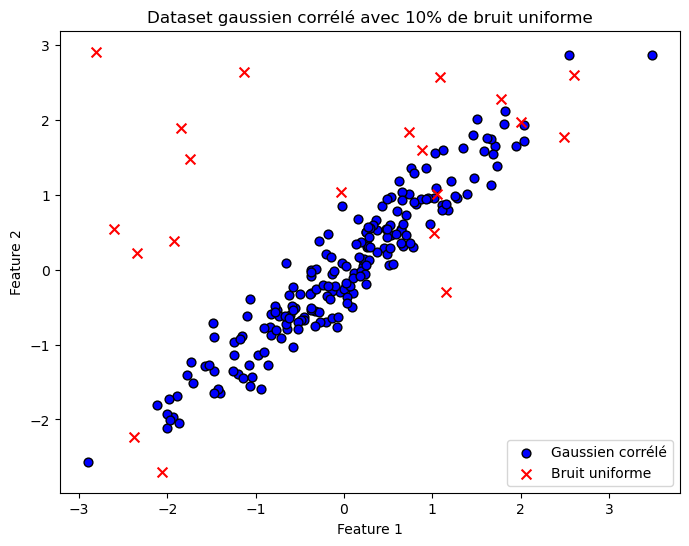

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(X0[:,0], X0[:,1], c='blue', s=40, edgecolor='k', label="Gaussien corrélé")
plt.scatter(X_noise[:,0], X_noise[:,1], c='red', marker='x', s=50, label="Bruit uniforme")
plt.legend()
plt.title("Dataset gaussien corrélé avec 10% de bruit uniforme")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Isolation Forest

## Data set 1

In [53]:
iforest = IsolationForest(n_estimators=100)
tmp = iforest.fit(X)
scores = iforest.score_samples(X)
y_pred = iforest.predict(X)

In [54]:
scores

array([-0.48517666, -0.52197427, -0.55099935, -0.50377126, -0.47698504,
       -0.50672156, -0.4953016 , -0.49089579, -0.51468065, -0.49151207,
       -0.48802943, -0.49329162, -0.46774821, -0.51345369, -0.47180146,
       -0.53583509, -0.47492022, -0.49742726, -0.47331952, -0.50187309,
       -0.50560009, -0.47289528, -0.47030024, -0.49258168, -0.49906582,
       -0.4719899 , -0.53068164, -0.466754  , -0.56377575, -0.46879111,
       -0.46562565, -0.48212333, -0.50526609, -0.49994478, -0.46922551,
       -0.51011251, -0.46652139, -0.49599589, -0.53087844, -0.52871469,
       -0.49454906, -0.45992207, -0.49182983, -0.4902971 , -0.50041039,
       -0.45772177, -0.47692462, -0.51345187, -0.47071937, -0.45820689,
       -0.57349866, -0.48601071, -0.49150075, -0.51678218, -0.49925641,
       -0.49207145, -0.50694867, -0.48892432, -0.47199007, -0.50355852,
       -0.50553604, -0.56089623, -0.47865218, -0.46741306, -0.48318442,
       -0.50735813, -0.46747704, -0.47847937, -0.4648335 , -0.51

In [57]:
threshold = np.quantile(scores, 0.05)
y_pred = np.where(scores < threshold, -1, 1)

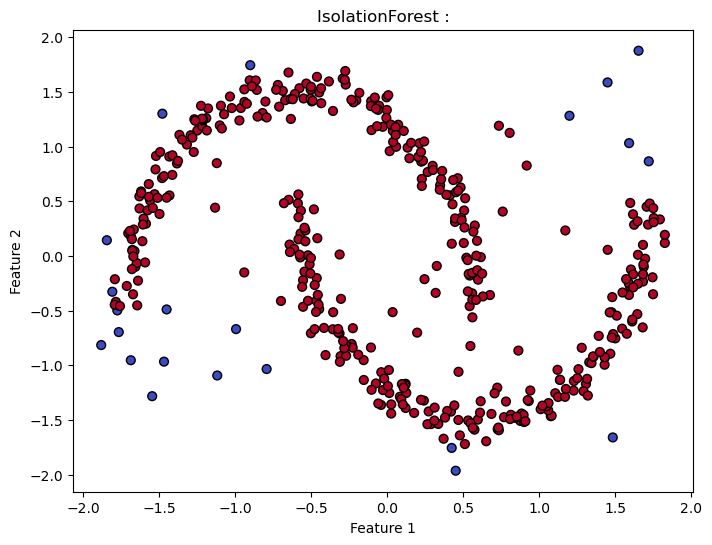

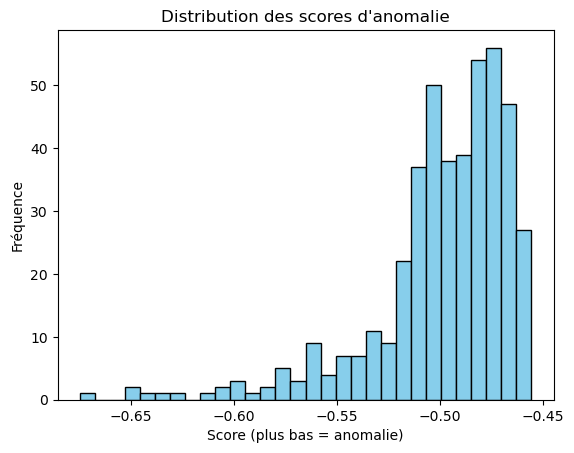

In [64]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap="coolwarm", s=40, edgecolor='k')
plt.title("IsolationForest :")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

plt.hist(scores, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score (plus bas = anomalie)")
plt.ylabel("Fréquence")
plt.show()

## Data set 2

In [59]:
iforest_2 = IsolationForest(n_estimators=100)
tmp_2 = iforest_2.fit(X_2)
scores_2 = iforest_2.score_samples(X_2)
y_pred_2 = iforest_2.predict(X_2)

In [60]:
scores_2

array([-0.40898241, -0.49468672, -0.41378484, -0.42706255, -0.47230095,
       -0.40925585, -0.40533402, -0.39909017, -0.44330899, -0.39829689,
       -0.49287425, -0.39422715, -0.51832808, -0.54374089, -0.39391854,
       -0.42177133, -0.42328709, -0.40741203, -0.5096748 , -0.411627  ,
       -0.39058757, -0.48028293, -0.4124883 , -0.40760624, -0.42898586,
       -0.39288927, -0.40808324, -0.41784243, -0.43452189, -0.42575946,
       -0.42230429, -0.41976105, -0.4010181 , -0.41793061, -0.47498225,
       -0.40311174, -0.45594256, -0.43134595, -0.42100648, -0.43449689,
       -0.42433356, -0.46533246, -0.46398007, -0.48327635, -0.48906233,
       -0.53160559, -0.48149253, -0.40204817, -0.4765612 , -0.48884029,
       -0.44024144, -0.39289027, -0.41396019, -0.45728537, -0.40176574,
       -0.40844234, -0.42492004, -0.41466343, -0.46946846, -0.45600363,
       -0.49964232, -0.46241317, -0.49529388, -0.45491772, -0.44610621,
       -0.48542653, -0.46945109, -0.48128547, -0.41159865, -0.48

In [61]:
threshold = np.quantile(scores, 0.05)
y_pred_2 = np.where(scores_2 < threshold, -1, 1)

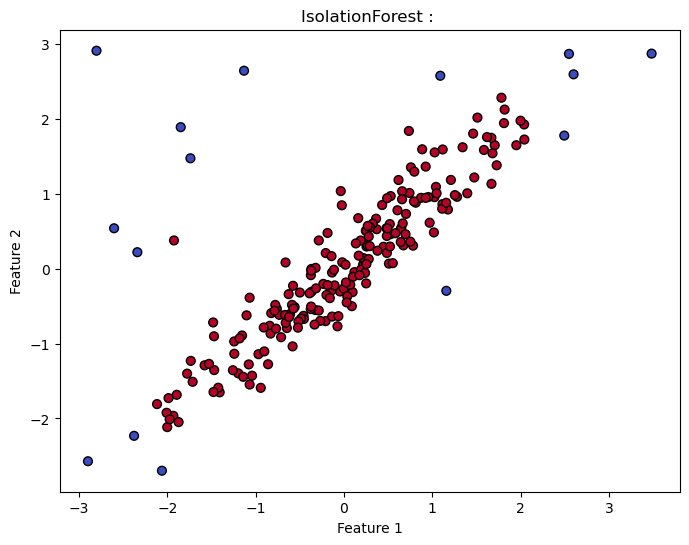

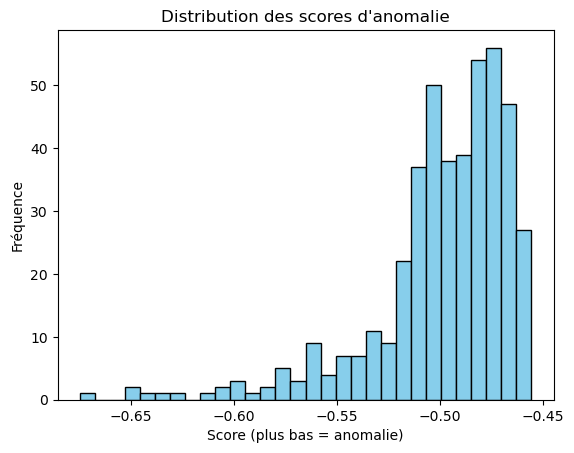

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(X_2[:,0], X_2[:,1], c=y_pred_2, cmap="coolwarm", s=40, edgecolor='k')
plt.title("IsolationForest : ")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

plt.hist(scores, bins=30, color="skyblue", edgecolor="black")
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score (plus bas = anomalie)")
plt.ylabel("Fréquence")
plt.show()

# Local Outlier Factor

## Data set 1

### Contamination 1%

In [ ]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
y_pred = lof.fit_predict(X)

In [87]:
scores = - lof.negative_outlier_factor_

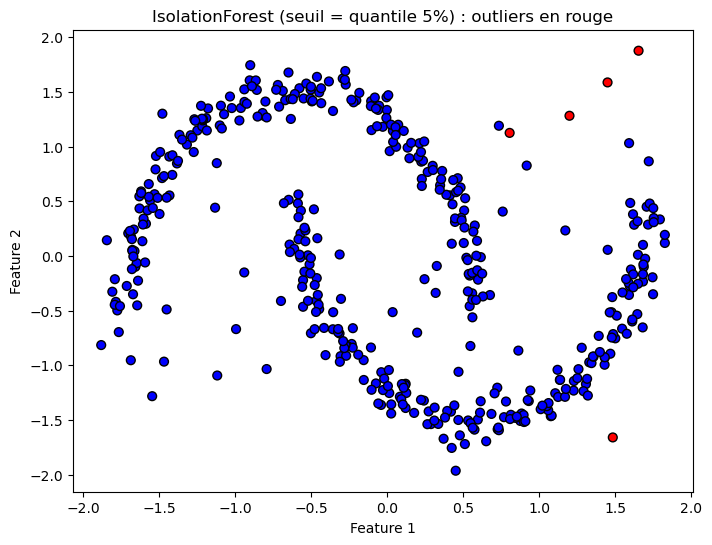

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_1664/1305757667.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


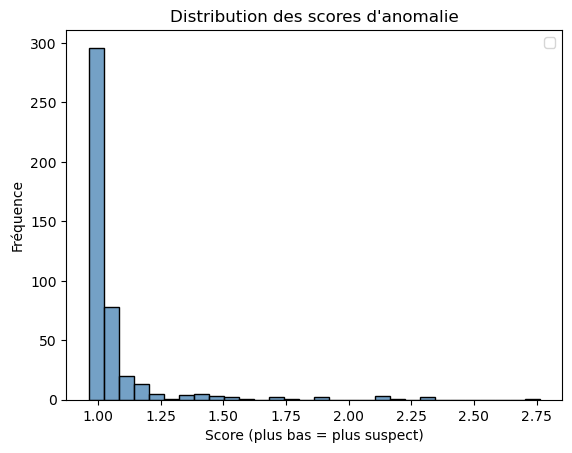

In [88]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 5%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Distribution des scores + repère du seuil
import seaborn as sns
sns.histplot(scores, bins=30, color="steelblue")
plt.legend()
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score (plus bas = plus suspect)")
plt.ylabel("Fréquence")
plt.show()

### Contamination 5%

In [89]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.05)
y_pred = lof.fit_predict(X)

In [90]:
scores = - lof.negative_outlier_factor_

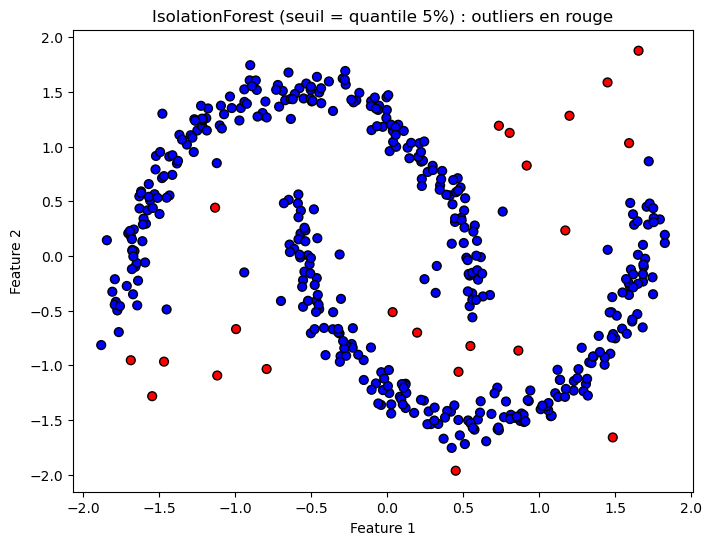

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_1664/1305757667.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


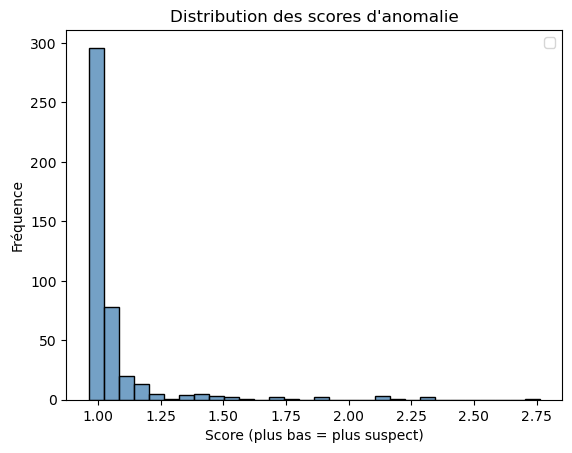

In [91]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 5%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Distribution des scores + repère du seuil
import seaborn as sns
sns.histplot(scores, bins=30, color="steelblue")
plt.legend()
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score (plus bas = plus suspect)")
plt.ylabel("Fréquence")
plt.show()

## Data set 2

### Contamination 1%

In [92]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.01)
y_pred = lof.fit_predict(X_2)

In [93]:
scores = - lof.negative_outlier_factor_

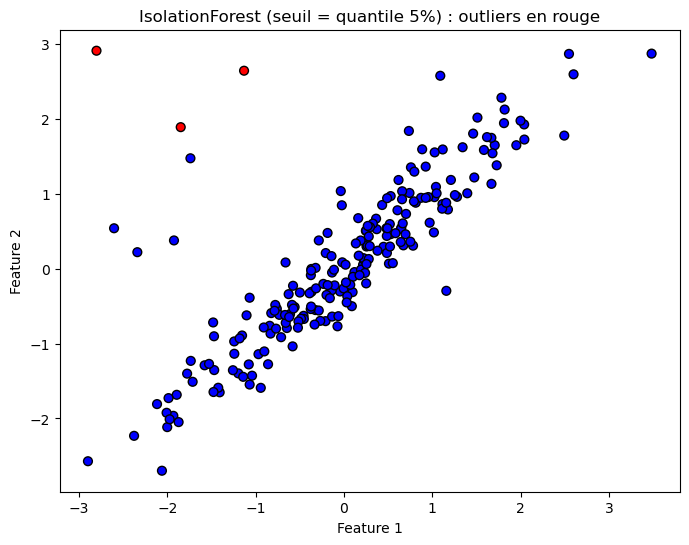

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_1664/1269995090.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


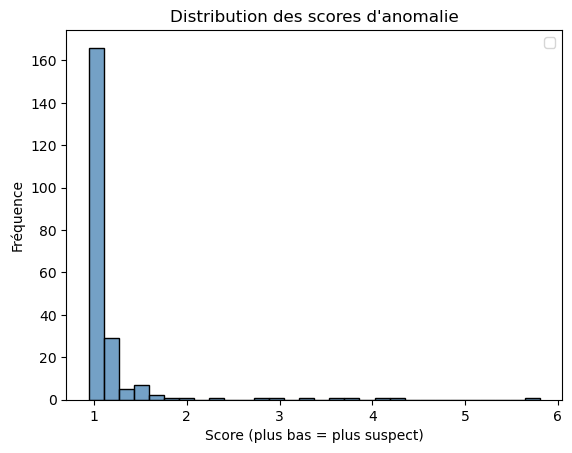

In [94]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 5%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Distribution des scores + repère du seuil
import seaborn as sns
sns.histplot(scores, bins=30, color="steelblue")
plt.legend()
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score (plus bas = plus suspect)")
plt.ylabel("Fréquence")
plt.show()

### Contamination 5%

In [95]:
lof = LocalOutlierFactor(n_neighbors=20,contamination=0.05)
y_pred = lof.fit_predict(X_2)

In [96]:
scores = - lof.negative_outlier_factor_

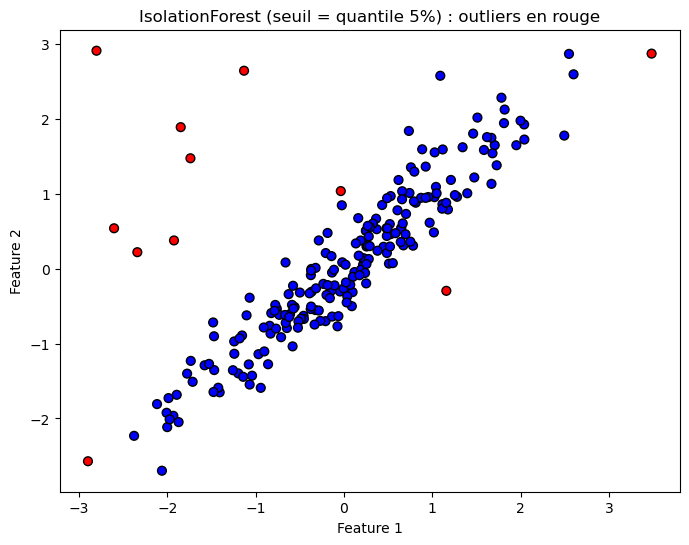

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_1664/1269995090.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


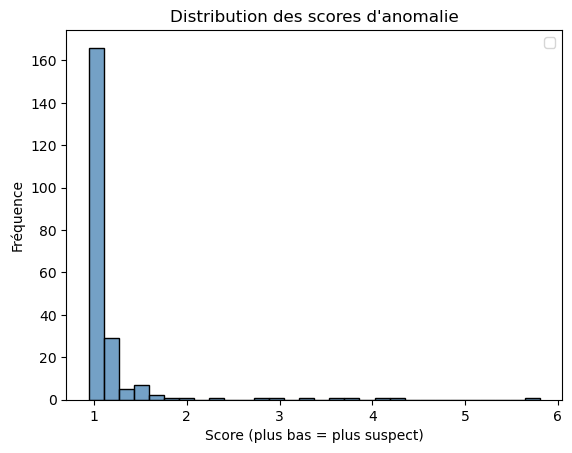

In [97]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 5%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Distribution des scores + repère du seuil
import seaborn as sns
sns.histplot(scores, bins=30, color="steelblue")
plt.legend()
plt.title("Distribution des scores d'anomalie")
plt.xlabel("Score (plus bas = plus suspect)")
plt.ylabel("Fréquence")
plt.show()

# Density Based Anomaly Detection

## Data set 1

### Contamination 1%

In [101]:
from sklearn.covariance import EllipticEnvelope
mod=EllipticEnvelope(contamination=0.01)
y_pred=mod.fit_predict(X)

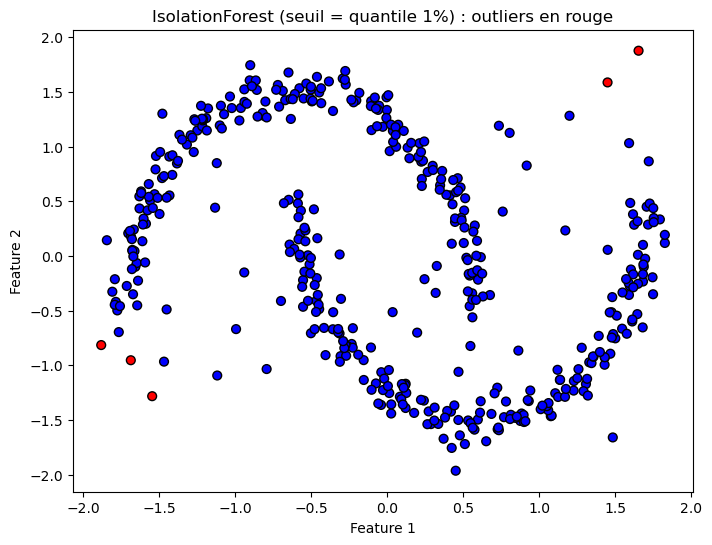

In [102]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 1%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Contamination 5%

In [103]:
mod=EllipticEnvelope(contamination=0.05)
y_pred=mod.fit_predict(X)

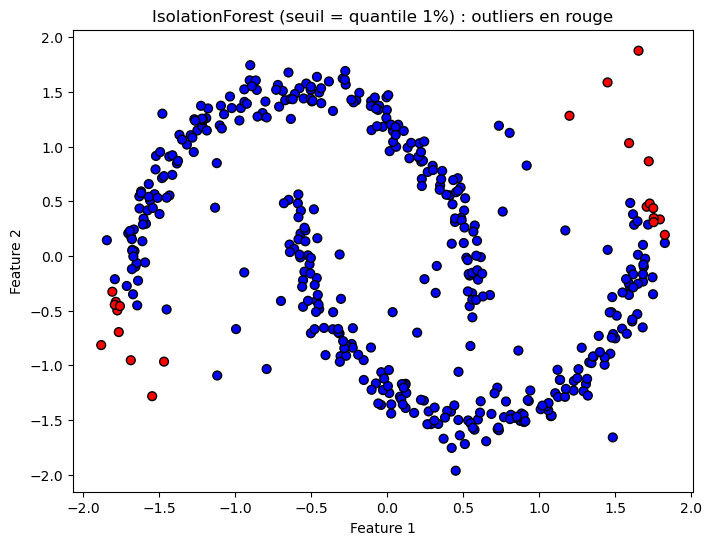

In [ ]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 5%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Data set 2

### Contamination 1%

In [105]:
mod=EllipticEnvelope(contamination=0.01)
y_pred=mod.fit_predict(X_2)

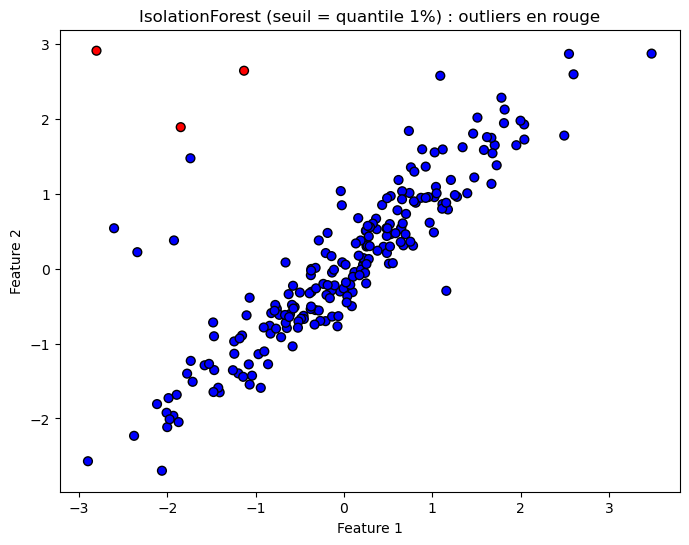

In [106]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 1%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Contamination 5%

In [107]:
mod=EllipticEnvelope(contamination=0.05)
y_pred=mod.fit_predict(X_2)

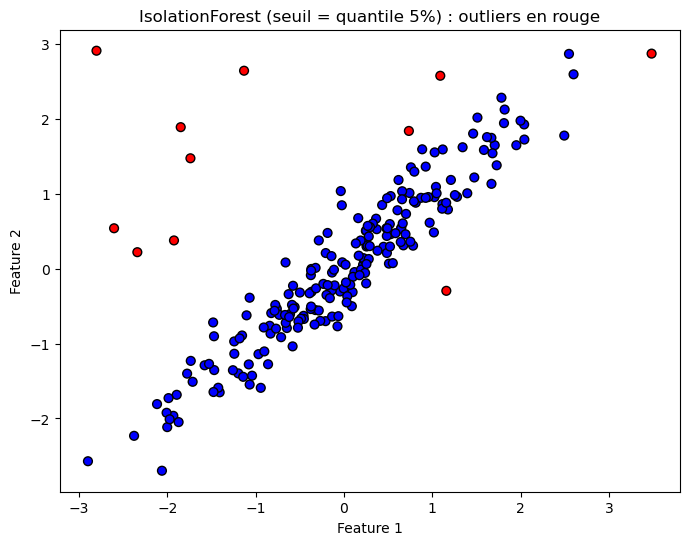

In [108]:
colors = np.where(y_pred == -1, "red", "blue")

plt.figure(figsize=(8,6))
plt.scatter(X_2[:, 0], X_2[:, 1], c=colors, s=40, edgecolor='k')
plt.title("IsolationForest (seuil = quantile 5%) : outliers en rouge")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()